In [1]:
from pathlib import Path
import numpy as np
from data.df_io import read, get_feat_lables
from data.df_prep import get_specific_split, pre_processing
from ai_models.PLA import PLA, PocketPLA
from ai_models.regression import LinearRegression, LogisticRegression
from metrics.metrics import compute_acc, confusion, eficiency_report
from visualization.models_plots import show_model_line


train_path = Path("../digits/db/train_redu_v.csv")
test_path = Path("../digits/db/test_redu_v.csv")

In [2]:
df_train = read(train_path, sep=",")
df_test = read(test_path, sep=",")

In [3]:
X_train, Y_train = get_feat_lables(df_train)
X_test, Y_test = get_feat_lables(df_test)

## Get specific 1x5 dataset

In [4]:
X_train_1x5, Y_train_1x5 = get_specific_split(X_train, Y_train, 1, 5)
X_test_1x5, Y_test_1x5 = get_specific_split(X_test, Y_test, 1, 5)

In [5]:
X_train_1x5

array([[ 44.7       ,  35.25098039],
       [ 59.85      ,  39.82745098],
       [ 48.55      ,  39.57254902],
       ...,
       [110.73      ,  65.03137255],
       [ 99.31      ,  70.27058824],
       [101.17      ,  63.3372549 ]])

In [6]:
Y_train_1x5

array([ 1,  1,  1, ..., -1, -1, -1])

In [7]:
base_column = np.ones((X_train_1x5.shape[0], 1))
base_column

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [8]:
X_train_1x5 = np.hstack((base_column, X_train_1x5))
X_train_1x5

array([[  1.        ,  44.7       ,  35.25098039],
       [  1.        ,  59.85      ,  39.82745098],
       [  1.        ,  48.55      ,  39.57254902],
       ...,
       [  1.        , 110.73      ,  65.03137255],
       [  1.        ,  99.31      ,  70.27058824],
       [  1.        , 101.17      ,  63.3372549 ]])

In [9]:
base_column = np.ones((X_test_1x5.shape[0], 1))
X_test_1x5 = np.hstack((base_column, X_test_1x5))
X_test_1x5

array([[  1.        ,  51.64      ,  35.6627451 ],
       [  1.        ,  51.67      ,  43.07058824],
       [  1.        ,  44.85      ,  36.42352941],
       ...,
       [  1.        ,  95.14      ,  59.15686275],
       [  1.        , 106.88      ,  58.16862745],
       [  1.        , 117.64      ,  68.65882353]])

In [10]:
zeros_Y_train_1x5 = Y_train_1x5.copy()
zeros_Y_train_1x5[zeros_Y_train_1x5 == -1] = 0

zeros_Y_test_1x5 = Y_test_1x5.copy()
zeros_Y_test_1x5[zeros_Y_test_1x5 == -1] = 0

## Train and test PLA

In [11]:
pla_model = PLA()
it, w, W = pla_model.fit(X_train_1x5, Y_train_1x5, epochs=1000)

In [12]:
Y_pred = pla_model.predict(X_train_1x5, w)
compute_acc(Y_train_1x5, Y_pred)

0.5625

In [13]:
it

1000

In [14]:
Y_pred = pla_model.predict(X_test_1x5, w)
compute_acc(Y_test_1x5, Y_pred)

0.5454545454545454

In [15]:
eficiency_report(Y_test_1x5, Y_pred)

{'acc': 0.5454545454545454,
 'precision': np.float64(0.5248618784530387),
 'recall': np.float64(0.976027397260274),
 'f1': np.float64(0.6826347305389222)}

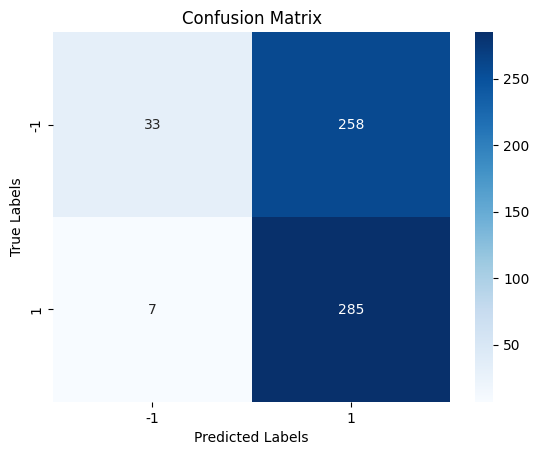

In [16]:
confusion(Y_test_1x5, Y_pred)

In [17]:
# show_model_line(
#     pd.DataFrame(X_train_1x5, columns=["intensity", "symmetry"]),
#     pd.DataFrame(Y_train_1x5, columns=["label"]), 
#     d1=1, 
#     d2=5,
#     w=w,
# )

## Train and test linear regression

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train_1x5, Y_train_1x5)
w = linear_model.getW()

In [19]:
Y_pred = linear_model.predict(X_train_1x5)
compute_acc(Y_train_1x5, Y_pred)

1.0

In [20]:
Y_pred = linear_model.predict(X_test_1x5)
compute_acc(Y_test_1x5, Y_pred)

1.0

In [21]:
eficiency_report(Y_test_1x5, Y_pred)

{'acc': 1.0,
 'precision': np.float64(1.0),
 'recall': np.float64(1.0),
 'f1': np.float64(1.0)}

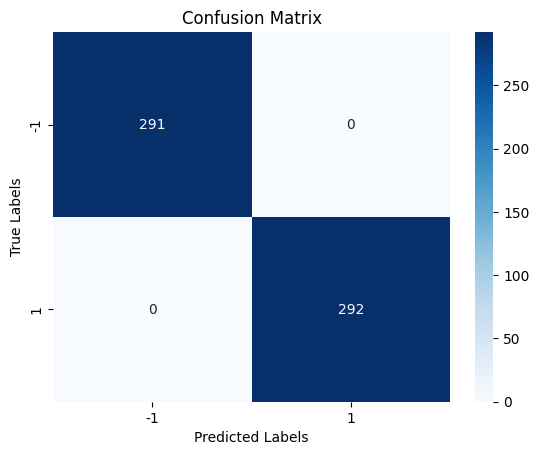

In [22]:
confusion(Y_test_1x5, Y_pred)

## Train and test logistic regression

In [23]:
linear_model = LogisticRegression(lr=0.001, n_iters=10000, bs=128)
linear_model.fit(X_train_1x5, zeros_Y_train_1x5)
w = linear_model.getW()

In [24]:
linear_model.cost

np.float64(0.1859920275466482)

In [25]:
Y_pred = linear_model.predict(X_train_1x5)
compute_acc(zeros_Y_train_1x5, Y_pred)

0.9983108108108109

In [26]:
Y_pred = linear_model.predict(X_test_1x5)
compute_acc(zeros_Y_test_1x5, Y_pred)

0.9982847341337907

In [27]:
eficiency_report(zeros_Y_test_1x5, Y_pred)

{'acc': 0.9982847341337907,
 'precision': np.float64(1.0),
 'recall': np.float64(0.9965753424657534),
 'f1': np.float64(0.9982847341337907)}

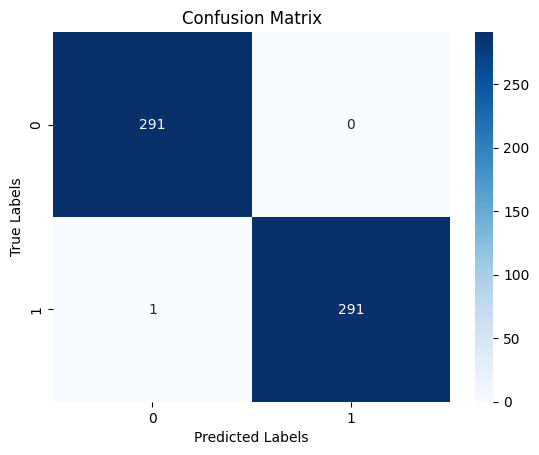

In [28]:
confusion(zeros_Y_test_1x5, Y_pred, 0, 1)